In [138]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

import os
import re
import pandas as pd
import altair as alt

pd.set_option("max_colwidth", 400)

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [177]:
import glob
import random
import base64

from PIL import Image
from io import BytesIO
from IPython.display import HTML

pd.set_option("display.max_colwidth", -1)


def get_thumbnail(path):
    i = Image.open(path).convert("RGB")
    i.thumbnail((224, 224), Image.LANCZOS)
    return i


def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, "jpeg")
        return base64.b64encode(buffer.getvalue()).decode()


def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
df = pd.read_csv("../data/seriouseats/seriouseats.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8312 entries, 0 to 8311
Data columns (total 11 columns):
title                8312 non-null object
short_description    2114 non-null object
thumbnail            8312 non-null object
url                  8312 non-null object
description          7787 non-null object
directions           8282 non-null object
ingredients          8282 non-null object
rating               2898 non-null float64
total_time           5810 non-null object
active_time          6119 non-null object
yields               7518 non-null object
dtypes: float64(1), object(10)
memory usage: 714.4+ KB


In [7]:
df.head()

,title,short_description,thumbnail,url,description,directions,ingredients,rating,total_time,active_time,yields
0,Jammy Fruit Bars,"Simple but satisfying fruit bars, made with your favorite fresh fruit or jam.",https://www.seriouseats.com/2019/05/20190429-fruit-oat-bars-vicky-wasik-20-625x469.jpg,https://www.seriouseats.com/recipes/2019/05/jammy-fruit-bars.html,"These fruity, oaty bars are inspired by Icelandic Hjónabandssæla (often translated as ""happy marriage cake""), but perhaps closer to an American bar cookie in execution. They're hearty and rich, thanks to plenty of rolled oats and butter in the crust and crumb topping, with a flavorful layer of jam or fresh fruit in between. What kind? That's all up to you!","Getting Ready: Adjust oven rack to lower-middle position and preheat to 350°F (180°C). Line an 8- by 2-inch square, anodized aluminum pan with two long strips of parchment to cover the bottom and sides, creasing as needed to ensure a secure fit.||||Make the Dough: In a large bowl, combine the rolled oats, all-purpose flour, brown sugar, baking powder, salt, baking soda, and cinnamon, then mix ...","For the Dough:||||4 1/2 ounces old fashioned rolled oats, not quick cooking, instant, or thick cut (about 1 1/3 cup; 128g)||||4 1/2 ounces all-purpose flour (about 1 cup, spooned; 128g)||||6 ounces light brown sugar (about 3/4 cup, firmly packed; 170g)||||1 teaspoon baking powder||||1 teaspoon (4g) Diamond Crystal kosher salt, plus more for sprinkling; for table salt, use about half as much by...",4.571429,About 90 minutes,about 15 minutes,About nine 3-inch squares
1,Balsamic Glazed Baby Back Ribs,"Smoky, sweet, and tangy ribs.",https://www.seriouseats.com/recipes/images/2016/07/20130519-252806-balsamic-glazed-ribs-625x469.jpg,https://www.seriouseats.com/recipes/2013/05/balsamic-glazed-baby-back-ribs-recipe.html,"Nothing can fulfill the defining barbecue trifecta of smoky, sweet, and tangy quite like ribs. These ribs combine a rub that features a trio of peppercorns with a low and slow cook over cherry wood. A brushing of balsamic barbecue sauce in the last half hour leaves the ribs with a glistening sheen.","To make the rub: Mix together brown sugar, salt, sugar, paprika, white pepper, black pepper, ground mustard, dried thyme, garlic powder, Szechuan peppercorns, and cayenne pepper in a small bowl. Set aside.||||Remove membrane from back of each rack of ribs and trim meat of excess fat. Season ribs liberally with rub all over.||||Fire up smoker or grill to 225°F, adding chunks of smoking wood whe...",For the Rub:||||2 tablespoons dark brown sugar||||2 tablespoons Kosher salt||||1 tablespoon granulated sugar||||1 tablespoon paprika||||1/2 teaspoon ground white pepper||||1/2 teaspoon ground black pepper||||1/2 teaspoon ground mustard||||1/2 teaspoon dried thyme||||1/2 teaspoon garlic powder||||1/2 teaspoon ground Szechuan peppercorns||||1/4 teaspoon cayenne pepper|||| ||||2 racks baby back r...,NaN,5 hours,45 minutes,Serves 4
2,The Best Meatball Pizza,"Does size matter? When it comes to meatballs on pizza, the answer is yes.",https://www.seriouseats.com/recipes/images/2015/01/20150109-meatball-pizza-small-balls-8-625x469.jpg,https://www.seriouseats.com/recipes/2015/01/meatball-pizza-recipe.html,"Meatball pizza consists of two Italian-American favorites, all rolled into one spectacularly comforting dish. But, as with all mashups, there's a bit of finesse to getting it right. It starts with our recipe for tender and juicy Italian-American meatballs—keeping the balls very small, which ensures that every bite is meaty—and pairs it with a simple tomato sauce flavored with a small amount of...","Set aside 1/2 cup meatball mixture. Form remaining mixture into small balls, roughly 3/4 inch in diameter. Set aside on a plate in the refrigerator.||||Place a Baking Steel on the top rack of the oven directly under the broiler and preheat oven to its highest possible temperature.||||Heat 2 tablespoons (30ml) oil in a medium saucepan 

In [9]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/mike/.local/share/virtualenvs/seefood-qNVnXCKQ/lib/python3.7/site-packages/en_core_web_sm
-->
/home/mike/.local/share/virtualenvs/seefood-qNVnXCKQ/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [233]:
from sklearn.pipeline import Pipeline
import sys

sys.path.append("..")

from seefood.data import (
    ThumbnailUrlTransformer,
    BasicTextTransformer,
    CreateLabelsTransformer,
    SelectColumnsTransformer,
)

In [81]:
p_pipeline = Pipeline(
    [
        (str(i), transformer)
        for i, transformer in enumerate(
            [
                ThumbnailUrlTransformer(
                    "thumbnail", "full_thumbnail_path", "../data/seriouseats/images"
                ),
                BasicTextTransformer("title", "p_title"),
                BasicTextTransformer("description", "p_description"),
                SelectColumnsTransformer(
                    ["full_thumbnail_path", "p_title", "p_description"]
                ),
            ]
        )
    ]
)
p_df = p_pipeline.fit_transform(df)

[nltk_data] Downloading package stopwords to /home/mike/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mike/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [234]:
from collections import defaultdict


def get_labels_pipeline(high_freq_threshold):
    steps = [
        (str(i), transformer)
        for i, transformer in enumerate(
            [
                CreateLabelsTransformer(
                    "p_title", "p_description", "label", high_freq_threshold
                )
            ]
        )
    ]
    return Pipeline(steps)


def analyze_label_count(df, high_freq_threshold):
    pipeline = get_labels_pipeline(high_freq_threshold)
    labels_df = pipeline.fit_transform(df)
    zero_labels_count = labels_df["label"].map(lambda x: 1 if len(x) == 0 else 0).sum()
    overall_label_count = len(set(itertools.chain(*labels_df["label"])))

    return zero_labels_count, overall_label_count


def get_all_labels(labels_df):
    return set(itertools.chain(*labels_df["label"]))

In [236]:
high_freq_thresholds = list(range(10, 300, 10))
zero_labels_count_results = []
overall_label_count_results = []

for high_freq_threshold in high_freq_thresholds:
    zero_labels_count, overall_label_count = analyze_label_count(
        p_df, high_freq_threshold
    )
    zero_labels_count_results.append(zero_labels_count)
    overall_label_count_results.append(overall_label_count)

label_analysis_df = pd.DataFrame(
    {
        "high_freq_threshold": high_freq_thresholds,
        "zero_labels_count": zero_labels_count_results,
        "overall_label_count": overall_label_count_results,
    }
)

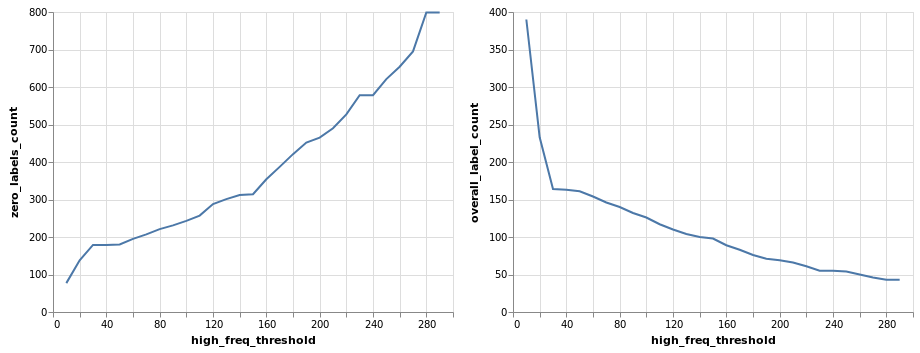

In [237]:
zero_labels_count_chart = (
    alt.Chart(label_analysis_df)
    .mark_line()
    .encode(x="high_freq_threshold", y="zero_labels_count")
)

overall_label_count_chart = (
    alt.Chart(label_analysis_df)
    .mark_line()
    .encode(x="high_freq_threshold", y="overall_label_count")
)

zero_labels_count_chart | overall_label_count_chart

In [240]:
pipeline = get_labels_pipeline(35)
labels_df = pipeline.fit_transform(p_df)
zero_labels_df = labels_df[labels_df["label"].map(lambda x: len(x) == 0)]

In [241]:
get_all_labels(labels_df)

{'almond',
 'anchovy',
 'apple',
 'apricot',
 'arugula',
 'asparagus',
 'bacon',
 'banana',
 'bar',
 'barbecue',
 'basil',
 'bean',
 'beef',
 'beer',
 'blueberry',
 'book',
 'bourbon',
 'bread',
 'breakfast',
 'breast',
 'burger',
 'butter',
 'cabbage',
 'cake',
 'caper',
 'carrot',
 'cauliflower',
 'cheddar',
 'cheese',
 'cherry',
 'chicken',
 'chickpea',
 'chile',
 'chip',
 'chocolate',
 'chop',
 'chorizo',
 'cider',
 'cilantro',
 'cocktail',
 'coconut',
 'cookie',
 'corn',
 'crab',
 'cream',
 'crispy',
 'cucumber',
 'curry',
 'dill',
 'dinner',
 'dip',
 'dressing',
 'duck',
 'egg',
 'eight_buck',
 'fennel',
 'feta',
 'fish',
 'flash',
 'food',
 'ginger',
 'goat',
 'grape',
 'gravy',
 'green',
 'ham',
 'hazelnut',
 'herb',
 'honey',
 'jalapeno',
 'jam',
 'kale',
 'kimchi',
 'kitchen',
 'lamb',
 'leek',
 'lemon',
 'lentil',
 'lime',
 'maple',
 'meatball',
 'mint',
 'mozzarella',
 'muffin',
 'mushroom',
 'mustard',
 'noodle',
 'olive',
 'onion',
 'orange',
 'oyster',
 'pan',
 'pancake'

,full_thumbnail_path,p_title,p_description,label
279,,"[rum, coconut, water]","[weekend, cocktail, paul, clarke, cocktail, chronicle, kinda, week, cheer, summer, home, seattle, afternoon, evening, heat, humidity, suck, chill, beer, minute, refresher, heat, strike, place, kitchen, mojito, crowd, guest, preparation, assertiveness, amber, rum, appleton, choice, angostura, bacardi, refreshment, impact, coconut, water, neighborhood, bodega, food, store, coconut, nothing, ascendance, version, food, store, grocery, course, coconut, work, drink, asian_market, place, sloshe, hole, top, kitchen, knife, cleaver, result, rum, strain, coconut, water, version, bit, pulp, light, tanginess, pair, vanilla, rum, temperature, glide, summer, refresher]","{kitchen, food, beer, summer, cocktail, coconut}"
6983,,"[artichoke, barigoule]","[artichoke, barigoule, springtime, vegetable, dish, france, light, flavor, result, braising, artichoke, vegetable, tender, variety, mushroom, none, today, period, time, mushroom]","{mushroom, vegetable}"
2043,,"[book, cassoulet]","[america, love, food, bean, macaroni, cheese, bagel, toast, toast, france, argue, cassoulet, classic, stew, bean, meat, jennifer, mclagan, author, week, book_selection, appreciation, misunderstood_ingredient, recipe, lamb, other, tomato, broth, discussion, crust, jennifer, cassoulet, serve, plan, dinner_party, eat, leftover, week, bean, array, meat, lamb_shoulder, duck_confit, sausage, fruit, dessert, addition, day, week, appreciation, misunderstood_ingredient, recipe, win]","{lamb, sausage, toast, book, food, tomato, bean, cheese, stew}"
8218,,"[pasta, cherry, tomato, sauce]","[cherry_tomatoe, riper, pectin, supermarket, factor, cherry_tomatoe, pasta, sauce, ingredient, minute, time, pasta, go]","{sauce, tomato, cherry, pasta}"
2403,,"[book, grape]","[author, table, fan, pan, grape, passard, chef, passion, vegetable, note, effect, complexity, flavor, belie, simplicity, process, stovetop, quarter, apple, grape, bit, butter, fruit, vegetable, pan, sweetness, juice, combination, apple, weather, thanksgiving, spread, five_copie, table, week, table, dorie_greenspan]","{book, butter, apple, pan, grape, vegetable}"
5615,,"[dinner, tonight, japchae, noodle, spinach, carrot, beef]","[year, jar, kimchi, fridge, barbecue, reason, japchae, spicy, comforting, kind, home, week, version, kitchen, recreation, soy, sauce, factor, noodle, vegetable, carrot, onion, mushroom, spinach, help, beef, protein, sauce, mixture, soy, sauce, brown_sugar, chili_flake, feeling]","{noodle, mushroom, beef, kitchen, spinach, dinner, kimchi, barbecue, vegetable, sauce, tonight, onion, carrot, spicy, soy}"
7479,,[konnyaku],"[food, planet, energy, calorie, celery, konnayaku, product, plant, family, konnayku, konjac, tongue, food, choice, calorie, food, majority, block, water, addition, konnyaku, powder, powder, package, konnayaku, calorie, brand, sugar, protein, block, intimation, food, day, konnyaku, sensation, time, virtue, dieter, food, lover, caloric, feature, konnayaku, flavor, food, product, chew, bouncy, texture, highlight, soup, seat, stew, root, konnyaku, year, pound, root, inch, diameter, root, ground, powder, powder, water, kind, agent, calcium, mixture, cake, konnyaku, mixture, noodle, texture, bear, resemblance, recipe, konnyaku, specify, cooking, time, konnyaku, half, hour, flavor, beef, time, complement, konnyaku, meat, piece, vegetable, lotus, root, konnyaku, beforehand, soup, stock, konnyaku, pot, ...]","{cake, noodle, salad, beef, food, pot, soup, vegetable, sauce, pan, stew, soy, mustard}"
3414,,"[flash, egg]","[breakfast, silk, robe, slipper, chunk, egg, half, earthy, anything, black_truffle, butter, egg, black_truffle, butter, egg, butter, melt, fleck, ingredient, gold, moonlight, trick, move, form, cloud, scream, bellini, bed, life, second, whip, ingredient]","{butter, breakfast, flash, egg}"
4682,,"[oyster, mignonnette, sauce]","[sauce, accent, oyster]","{oyster, sauce}"
2591,,"[potato, tarragon, goat,
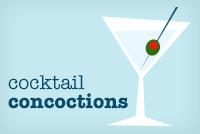
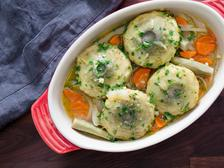
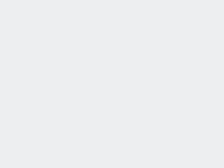
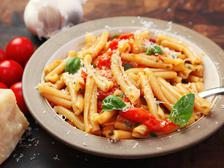
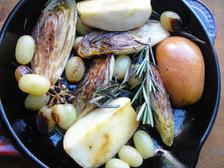
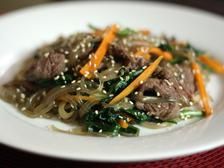
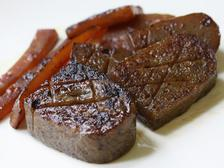
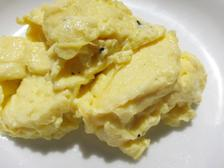
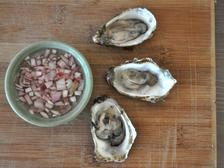
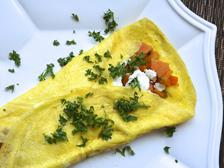
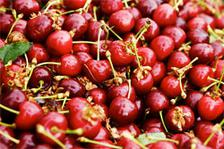
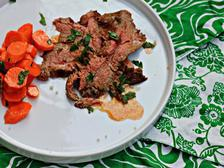
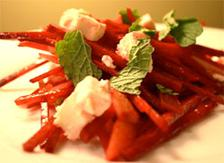
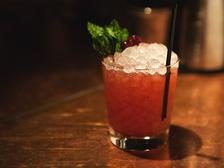
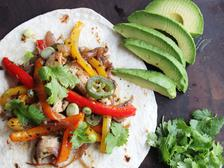

In [243]:
HTML(
    labels_df.sample(15).to_html(
        formatters={**{"full_thumbnail_path": image_formatter}}, escape=False
    )
)

# Train Model

,full_thumbnail_path,p_title,p_description,label
6204,,"[slaw, dog]","[hot_dog, tangy, slaw, note, hot_dog, bun, plate, cover, paper_towel, microwave, second, skillet, heat, batch, cole, slaw, slaw, dog, side]",{}
1458,,"[grill, thanksgiving, leftover, panini]",[nan],{}
2248,,"[quail, spiedini, sage, polenta]",[nan],{}
4621,,[panela],"[note, panela, sugar, discs, brick, panela, ingredient, grocery_store, writer, queens_ny, work, autumn, alphabet_soup, podcast, talk]",{}
5134,,[beefonnaise],"[note, animal, mayonnaise, recap, recipe, mayonnaise, start, emulsion, mayonnaise, maker, problem, breaking, mayonnaise, mayonnaise, bowl, whisk, mayonnaise, oil, place, animal, fat, flavor]",{}
2245,,"[strawberry, shortcake]","[james_beard, strawberry, shortcake, dough, version, shortcake, stand, spoonful, strawberry, fact, shortcake, work]",{}
3835,,"[mole, fajita]","[mole, crust, fajita, character, note, equivalent_weight, flap, flank, hanger_steak, place, skirt_steak, tex_mex, grill, backyard_barbacoa, robb_walsh]",{}
8212,,[fry],"[fry, instruction, fry]",{}
662,,"[praline, pray, leen, prah, leen]","[mccoy, voce, manhattan, dessert, recipe, way, praline, visit, praline, hotel, room, bed, dresser, drawer, stale, guest, gift, bag, friend, treat, praline, disappointment, dessert, work, pastry_chef, restaurant, pecan, cuisine, evening, fashion, lot, pimm, cup, bourbon, pronunciation, pronounce, candy, man, master, word, anything, sugar, accent, line, birminghamster, drawl, tooth, decade, defense, pari, time, year, weekend, foot, soil, confection, root, seed, other, relationship, debate, week, odd, thing, prah, leen]",{}
6466,,"[diy, melon, liqueur]","[midori, discount, deliciousness, melon, liqueur, melon, liqueur, flavor, liqueur, start, half, sugar, water, mixture, rest, day, sample, syrup, taste]",{}

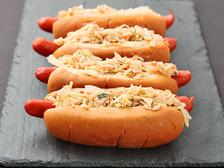
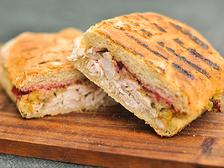
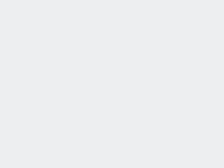
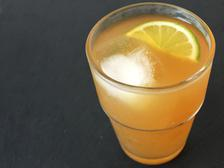
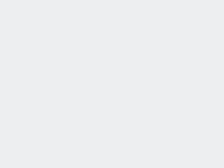
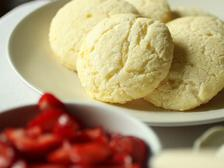
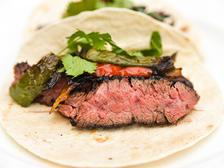
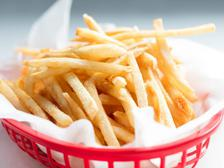
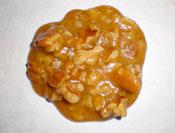
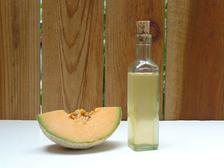
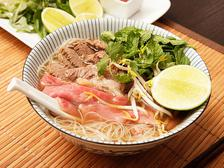
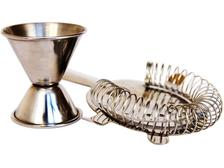
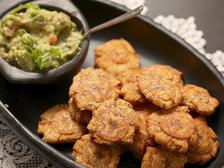
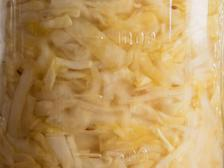
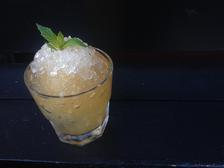
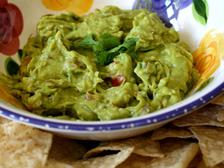
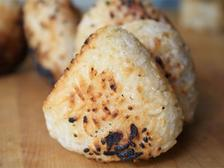
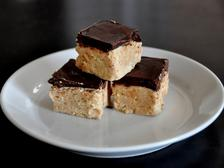
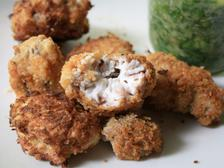
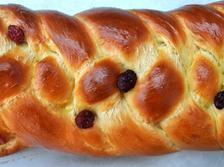

In [230]:
HTML(
    zero_labels_df.sample(20).to_html(
        formatters={**{"full_thumbnail_path": image_formatter}}, escape=False
    )
)

In [34]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False


image_model = models.squeezenet1_0(pretrained=True)
set_parameter_requires_grad(
    image_model, True
)  # make sure we only modify the last layer


class ImageFeatureExtractor(nn.Module):
    def __init__(self, image_model):
        super(ImageFeatureExtractor, self).__init__()
        self.image_model = image_model.features
        self.avg_pool2d = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        x = self.image_model(x)
        x = self.avg_pool2d(x)
        x = x.reshape(-1, 512)
        return x


feature_extractor = ImageFeatureExtractor(image_model)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
feature_extractor = feature_extractor.to(device)

In [53]:
IMAGE_SIZE = 224


class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.images = df["image_path"].reset_index(drop=True)
        self.transform = transforms.Compose(
            [
                transforms.Resize(IMAGE_SIZE),
                transforms.CenterCrop(IMAGE_SIZE),
                transforms.ToTensor(),
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
            ]
        )

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images.iloc[idx]
        image = Image.open(img_path).convert("RGB")
        image = self.transform(image)
        return image


dataset = ImageDataset(df)
dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=64, shuffle=False, num_workers=2
)

In [54]:
features = []
for item in dataloader:
    item = item.to(device)
    features.append(feature_extractor(item))

features = torch.cat(features)
features.size()

/home/mike/.local/share/virtualenvs/seefood-qNVnXCKQ/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8552 bytes but only got 8356. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag))


torch.Size([8304, 512])

In [55]:
from annoy import AnnoyIndex

annoy_index = AnnoyIndex(512)
if os.path.isfile("index_baseline_model_pytorch.ann"):
    annoy_index.load("index_baseline_model_pytorch.ann")
else:
    for i, f in enumerate(features):
        annoy_index.add_item(i, f)

    annoy_index.build(10000)
    annoy_index.save("index_baseline_model_pytorch.ann")

True

True

,image_path,n_0,n_1,n_2,n_3,n_4,n_5,n_6
0,,"{pizza, tomato, meatball, sauce}","{coconut, cream}",{},"{onion, gratin, new, cheesy, bacon, potato, cheese}","{stew, vegetable, onion, sauce, chop, beef, pasta, garlic, tomato, cheese}","{sauce, roll, stuff, bake, tomato, cabbage, bacon, rice, smoky}","{quiche, meat, potato}"
1,,"{onion, sauce, pepper, chili, pasta, sausage, egg, tomato, red, bacon, spaghetti, spice, cheese}","{summer, tomato, pasta}","{pasta, tomato, crab, zucchini, linguine}","{coleslaw, vinaigrette, creamy, chili}","{peruvian, salad, seafood, onion, fry, red, tomato, lime, fish, marinate, spicy, shrimp}","{ginger, chicken, shred, stuff, curry, noodle, red, pork, rice, spicy}","{orzo, chard, dill, baked, feta}"
2,,"{pecorino, italian, grill, meatball, beef, egg, garlic, parmesan, pork, cheese}","{rum, oat, bake, baked, crumble, jam, apple}","{salad, ginger, herb, rice, burger, patty, cilantro, chili, garlic, white, lime, pork, bacon, thai, spice}","{sauce, brown, patty, egg, indian, rice, spicy}","{yogurt, muffin, berry, crumble, brown_sugar}","{pie, sauce, butter, pea, stuff, brown, crust, bake, meatloaf, parmesan, carrot, potato, cheese}","{yogurt, sauce, lamb, meatball, beef, garlic, tomato, walnut, bread, spaghetti, spice}"
3,,"{ginger, wrap, stuff, spinach, sandwich, shrimp}",{corn},"{noodle, skin, tofu}","{layer, cake, lemon}","{cookie, butter, egg, bake, bread, white, almond}","{vegetable, asparagus, savory, bean, spinach, green, broth, japanese}","{sauce, bean, avocado, brown, rice, creamy, spice, cheese}"
4,,"{french, sauce, turkey, roast, sandwich, soup, bake, baked, bread, cranberry, toast}","{onion, bean, sandwich, bread, pork, spicy, pickle, cheese}","{sous_vide, rib, barbecue, pork}","{onion, avocado, stuff, sandwich, green, lime, chile, crab, creamy}","{onion, bread, whole_wheat}","{grill, sandwich, chorizo, creamy, spicy, toast, cheese}","{salad, butter, fry, grill, sandwich, pan, egg, green, vinaigrette, bread, white, toast, cheese}"
5,,"{sauce, rib, pork, spicy, bourbon}","{ginger, fennel, red, spice, marinate, chinese}","{onion, sauce, rib, roast, chipotle, garlic, black, oven}","{pineapple, honey, garlic, tomato, glaze, braise, apple}","{coconut, cream}","{grill, thai, pork}","{sauce, wing, egg, bake, thai, crispy, spicy}"
6,,"{butter, steak, sear, grill, pan}","{sous_vide, rib, barbecue, pork}","{herb, butter, steak, grill, chipotle, garlic, lime, rub, spicy, spice}","{chicken, cabbage, bacon, thigh, crispy, braise}","{asparagus, vegetable, spinach, ham, frittata, creamy, cheese}","{brown, stuffing, turkey, stuff}","{marinate, sardine}"
7,,{cocktail},"{banana, honey, cocktail, egg, almond, spice, roasted}","{cobbler, cranberry}","{stew, salt, lemon, preserve}","{cocktail, basil}","{ice_cream, sauce, apricot, peach, cake, toast}","{diy, raspberry}"
8,,"{salad, sauce, noodle, sichuan, chili, garlic, cucumber, black, sesame, peanut}","{salad, onion, greek, tomato, ultimate, cucumber, pickle, cheese}","{herb, sauce, pesto, ricotta, tomato, gnocchi, creamy, cheese}","{salad, chop, sandwich, pasta, tomato, toast}","{herb, chicken, sauce, wrap, mint, feta, bread, potato}","{salad, yogurt, dressing, carrot, pickle, spice, toast}","{ginger, avocado, noodle, mint, soup, salmon, coconut, egg, sea, chinese, stir}"
9,,"{patty, sausage, pork, cabbage, braise, apple}","{vegetable, onion, herb, chicken, butter, summer, grill, squash, steak, fry, garlic, egg, rice, risotto, zucchini}","{vegetable, salad, asparagus, chicken, onion, quiche, roast, bacon}","{sauce, chicken, pumpkin, stuff, seed, green, chile}","{noodle, eggplant, three, spicy, kale, sauce, curry, fry, beef, pan, coconut, egg, potato, stew, stuff, brown, red, green, pork, rice, crispy, spice, shrimp, toast, peanut, vegetable, roast, thai, dip}","{pie, blueberry, bake, crumb, cake}","{cream, coconut}"

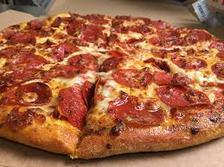
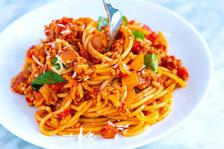
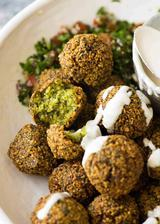
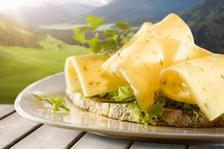
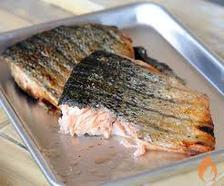
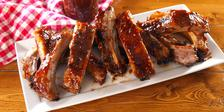
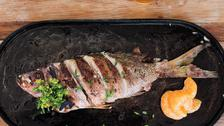
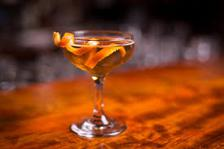
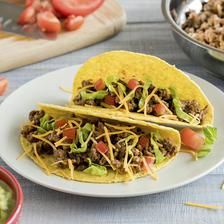
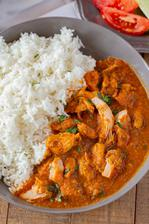
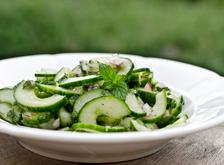
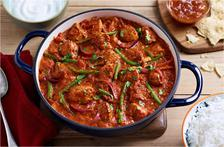
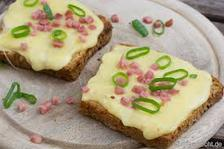
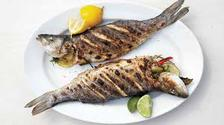
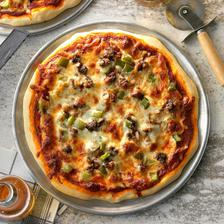
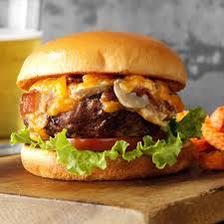
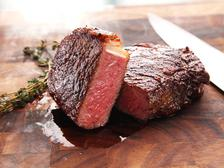

In [84]:
from collections import defaultdict

nearest_cols = defaultdict(list)
num_nearest = 7

examples_df = pd.DataFrame(
    {"image_path": [f"data/examples/{img}" for img in os.listdir("data/examples")]}
)

examples_dataset = ImageDataset(examples_df)
examples_dataloader = torch.utils.data.DataLoader(
    examples_dataset, batch_size=1, shuffle=False, num_workers=1
)

predictions = []
for image in examples_dataloader:
    image = image.to(device)
    with torch.no_grad():
        p = feature_extractor(image)
        predictions.append(p.squeeze())
examples_df["prediction"] = predictions

for p in examples_df.prediction:
    nearest = annoy_index.get_nns_by_vector(p, num_nearest)
    for ii, n in enumerate(nearest):
        nearest_cols[ii].append(df.iloc[n].high_freq_labels)

for key, col in nearest_cols.items():
    examples_df[f"n_{key}"] = col

HTML(
    examples_df.drop(["prediction"], axis=1).to_html(
        formatters={**{"image_path": image_formatter}}, escape=False
    )
)